# **Assignment-3  Task-1**

# **Shubham Muley**
### **20MAI0056**


In [92]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
#np.random.seed(0)
AlexNet = Sequential()

In [95]:
#1st Convolution Layer
AlexNet.add(Conv2D(filters=96,input_shape=(32,32,3),kernel_size=(11,11),strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [96]:
#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

In [97]:
#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [98]:
#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [99]:
#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

In [100]:
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

In [101]:
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

In [102]:
#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [103]:
#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [104]:
#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [105]:
#Model Summary
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_18 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_18 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_19 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_19 (Activation)   (None, 4, 4, 256)        

In [106]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [107]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [108]:
# # Ques1. Sample input and output images.

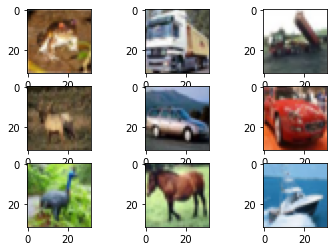

In [109]:
from matplotlib import pyplot
# plot first few input images from training datasets
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

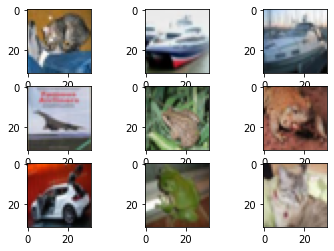

In [110]:
# plot first few input images for testing dataset
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [111]:
# # Ques2. The total images in the database, size of the image, no of classes in the database.

In [112]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [113]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(35000, 32, 32, 3), y=(35000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(15000, 32, 32, 3), y=(15000, 1)


In [114]:
print("Total images in dataset: ",x_train.shape[0]+x_test.shape[0]+x_val.shape[0])

Total images in dataset:  60000


In [115]:
print("Size of the image: ",x_train[0].shape)

Size of the image:  (32, 32, 3)


In [116]:
classes = np.unique(y_train)
print("classes in output class is: ",classes)
print("No. of classes in output class: ",len(classes))

classes in output class is:  [0 1 2 3 4 5 6 7 8 9]
No. of classes in output class:  10


In [117]:
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

In [118]:
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [119]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))

print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [120]:
# # Ques3. The first convolution function kernel filter coefficient values

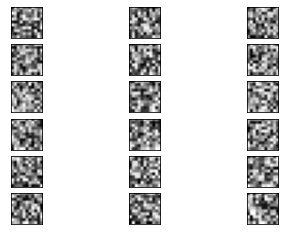

In [121]:
filters, biases = AlexNet.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [122]:
# # Ques4. The training accuracy / training error

In [123]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

In [124]:
#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [125]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [126]:

#Defining the parameters
batch_size= 100
epochs=10
learn_rate=.001  

In [81]:

AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
350/350 [==============================] - 23s 63ms/step - loss: 1.8003 - accuracy: 0.3452 - val_loss: 1.9110 - val_accuracy: 0.3281
Epoch 2/10
350/350 [==============================] - 16s 45ms/step - loss: 1.4202 - accuracy: 0.5012
Epoch 3/10
350/350 [==============================] - 16s 45ms/step - loss: 1.2857 - accuracy: 0.5469
Epoch 4/10
350/350 [==============================] - 16s 45ms/step - loss: 1.1970 - accuracy: 0.5873
Epoch 5/10
350/350 [==============================] - 16s 45ms/step - loss: 1.1083 - accuracy: 0.6179
Epoch 6/10
350/350 [==============================] - 16s 45ms/step - loss: 1.0698 - accuracy: 0.6303
Epoch 7/10
350/350 [==============================] - 16s 45ms/step - loss: 0.9803 - accuracy: 0.6648
Epoch 8/10
350/350 [==============================] - 16s 45ms/step - loss: 0.9667 - accuracy: 0.6705
Epoch 9/10
350/350 [==============================] - 16s 45ms/step - loss: 0.9080 - accuracy: 0.6921
Epoch 10/10
350/350 [===================

In [82]:
import os
import time
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [83]:
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

In [84]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    #Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


In [85]:
# # Ques5 The testing accuracy

In [86]:
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [87]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

In [88]:

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Confusion matrix, without normalization


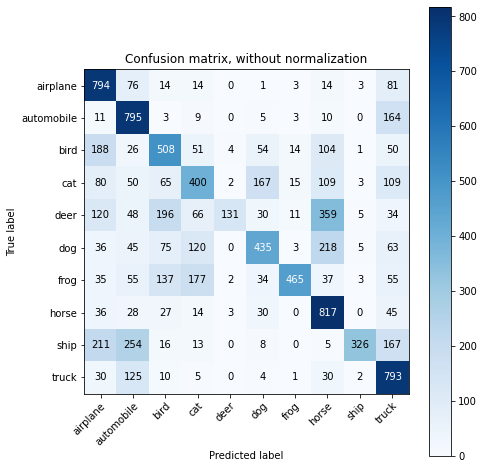

In [89]:
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


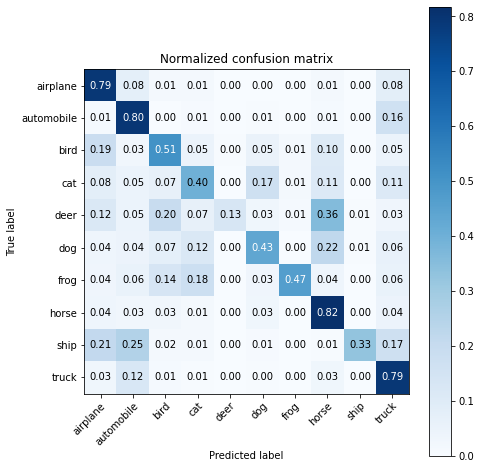

In [90]:

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')


In [91]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Testing Accuracy Score = ', acc_score)

Testing Accuracy Score =  0.5464
